# PEC 2 Asignatura Aprendizaje Automático Aplicado

## Máster en Data Science - UCJC

### Curso 2024/2025

Profesor: Francisco Lamas López - francisco.lamas@ucjc.edu

- Fecha de entrega a los alumnos: **15ENE2025**


- Fecha límite de entrega de soluciones: **16FEB2025**


- Fecha orientativa de correcciones: **28FEB2025**

### INSTRUCCIONES:

Resolver individualmente los siguientes 6 ejercicios (cada uno de los cuales tiene idéntica valoración, 1/6 del total)


Se dará una puntuación final sobre 10 a cada alumno para esta PEC2 (75% del total de PEC's)


Rellenar sobre este Notebook (entregar como archivo .ipynb con los apellidos incluidos en el nombre del archivo en mayúsculas)

Aspectos importantes a tener en cuenta:

- Seguir los pasos recomendados en cada uno de los 3 ejercicios (como listas de ítems en el markdown), ya que os servirán como guía para resolverlos

- Intentar siempre, en la parte de análisis y comparación, plotear y exponer gráficos cuando sea posible sobre los resultados obtenidos

- Comentar y argumentar los resultados obtenidos

En caso de no poder entregarla a través del BlackBoard, enviar antes de la fecha límite al email francisco.lamas@ucjc.edu (explicar en el email error obtenido durante la subida a BlackBoard)

### ALUMNO (APELLIDOS, NOMBRE):

Rodríguez Muértegui, Sergio

### EMAIL ALUMNO:

sergio.rmuertegui@alumno.ucjc.edu

#### Uso de Datasets en la PEC2

En esta práctica, se deben utilizar los datasets que se especifiquen en cada uno de los ejercicios, adjuntos a esta PEC en el BlackBoard.

### EJERCICIO 1

Evalúa al menos 2 modelos de clasificación supervisada (SVC, Regresor Logístico, KNN Classifier... por ejemplo) haciendo 2 tipos de Cross-Validation sobre cada uno de ellos. En el ejercicio busca una combinación de hiperarámetros óptima (con Grid Search o Randomized Search) para cada uno de ellos. Razonar cual sería el modelo que mejor generaliza los resultados, entre los entrenamientos realizados. Mostrar gráficamente los resultados y explicar el scoring o métrica escogida.

Utilizar el conjunto de datos winequality-red.csv, este dataset contiene para los vinos de la denominación de origen Minho una serie de métricas donde se caracterizan diferentes tipos de vinos. Entre estos valores se encuentran el pH, su densidad, el nivel de alcohol o su calidad (que van potencialmente desde 1 hasta 8).

In [46]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

myfile='winequality-red.csv'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

wine=pd.read_csv(myfile,sep=';')

print(wine.head())
print(wine.columns)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

Una vez cargado los módulos necesarios, comprobamos que no falte ningún dato en el dataset de **`winequality-red.csv`**. Luego separamos la variable objetivo `quality` del resto de variables predictoras para comenzar a preprocesar y dividir los datos en conjuntos de entrenamiento y de prueba.

In [47]:
#Importamos los módulos necesarios
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold, StratifiedKFold
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [48]:
print(f'\nComprobamos si existe algún valor nulo:\n{wine.isnull().sum()}')


Comprobamos si existe algún valor nulo:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [49]:
#Separamos los conjuntos de datos de la variable wine
X, y = wine.drop(columns='quality'), wine['quality'] #Escogemos quality como la variable objetivo

In [50]:
#Preprocesamos los datos
scaler= StandardScaler()
X_scaled = scaler.fit_transform(X)

#Dividimos los datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size= 0.2, random_state=13)

Utilizaremos en este caso el modelo **SVC (Support Vector Classifier)** y el **KNN (K-Nearest Neighbors) Classifier** y por medio del **GridSearchCV** implementaremos varios hiperparámetros con el fin de encontrar la mejor combinación de los mismos para cada modelo. Además, se aplicarán *K-Fold* y *Stratified K-Fold* como las técnicas Cross-Validations en todas las entrenamientos, obteniendo por tanto, para cada modelo, el mejor modelo con cada técnica de Validación Cruzada.

In [51]:
#Creamos una biblioteca con los modelos a usar
modelos= {
    'SVC' : SVC(),
    'KNN' : KNeighborsClassifier()
}

#Creamos una bibilioteca con los hiperparámetros del GridSearch
param_grid = {
    'SVC' : {'C' : [0.05, 0.1, 0.5, 1, 10, 50, 100], 'kernel' : ['linear', 'rbf', 'poly']},
    'KNN' : {'n_neighbors' : [3, 5, 7, 9, 11 ,13], 'weights' : ['uniform', 'distance']}
}

In [52]:
#Generamos las validaciones cruzadas
kf = KFold(n_splits=5, shuffle=True, random_state=13)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=13)

In [53]:
#Creamos un bucle por el cual se realicen cada uno de los modelos de clasificación supervisados
resultados= {} #Para almacenar los resultados finales

for nombre, modelo in modelos.items():
    grid_search= GridSearchCV(modelo, param_grid[nombre], cv =kf, scoring= 'accuracy')
    grid_search.fit(X_train, y_train)

    mejor_modelo = grid_search.best_estimator_
    scores_kf = cross_val_score(mejor_modelo, X_train, y_train, cv= kf, scoring = 'accuracy')
    scores_skf= cross_val_score(mejor_modelo, X_train, y_train, cv= skf, scoring= 'accuracy')

    resultados[nombre]= {
        'mejores_parametros' : grid_search.best_params_,
        'kf_media_score' : np.mean(scores_kf),
        'skf_media_score' : np.mean(scores_skf)
    }

In [54]:
#Mostramos los mejores hiperparámetros y resultados
for modelo, datos in resultados.items():
    print(f'{modelo}: Mejor configuración {datos['mejores_parametros']}, Precisión KF: {datos['kf_media_score']:.4f}, Precisión SKF: {datos['skf_media_score']:.4f}')

SVC: Mejor configuración {'C': 10, 'kernel': 'rbf'}, Precisión KF: 0.6193, Precisión SKF: 0.6388
KNN: Mejor configuración {'n_neighbors': 11, 'weights': 'distance'}, Precisión KF: 0.6607, Precisión SKF: 0.6560


El mejor modelo **KNN** tiene `n_neighbors=11` y `weights=distance` lo que lo hace un modelo flexible. Sin embargo, el mejor modelo **SVC** tiene un valor alto de `C`(`C=10`) lo que indica un posible sobreajuste en el modelo al enfocarse, este hiperparámetro, en separar los datos perfectamente. 

Una vez obtenidos y analizados brevemente los mejores modelos, realizamos un gráfico de barras para comparar comodamente la precisión de los 4 modelos obtenidos.

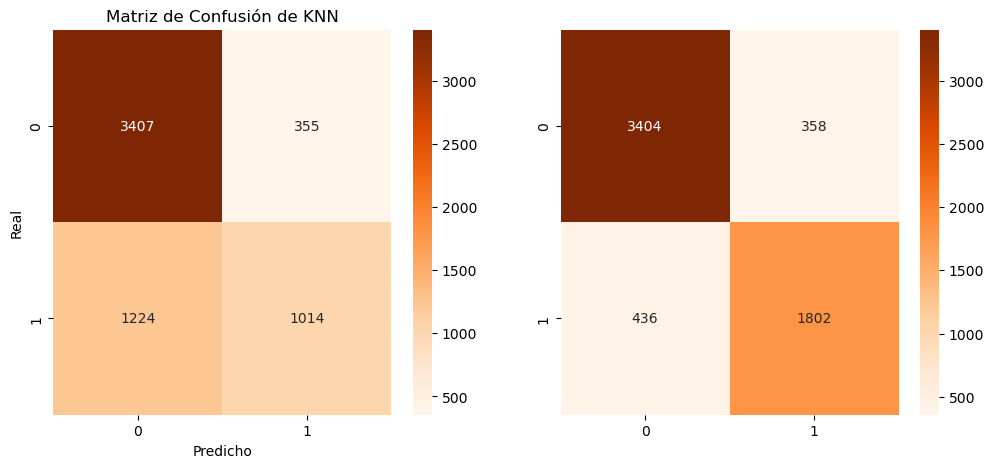

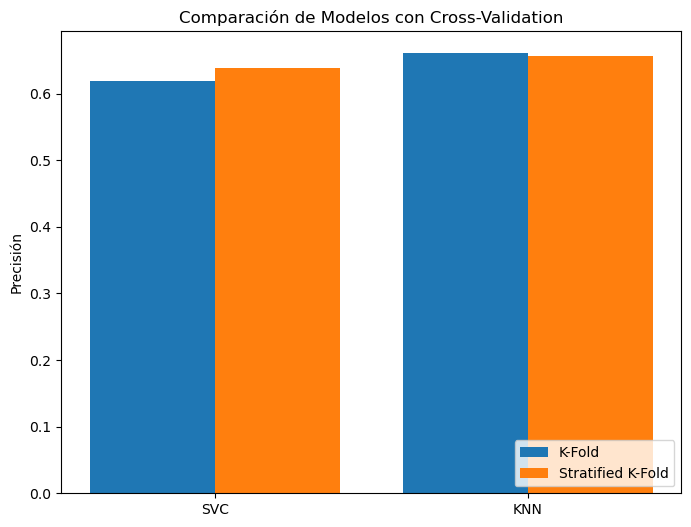

In [55]:
#Gráficos de comparación
fig, ax = plt.subplots(figsize=(8, 6))
metodos = list(resultados.keys())
kf_scores = [resultados[m]['kf_media_score'] for m in metodos]
skf_scores = [resultados[m]['skf_media_score'] for m in metodos]

bar_width = 0.4
x = np.arange(len(metodos))

ax.bar(x - bar_width/2, kf_scores, bar_width, label='K-Fold')
ax.bar(x + bar_width/2, skf_scores, bar_width, label='Stratified K-Fold')

ax.set_xticks(x)
ax.set_xticklabels(metodos)
ax.set_ylabel('Precisión')
ax.set_title('Comparación de Modelos con Cross-Validation')
ax.legend(loc='lower right')
plt.show()

Como se puede puede observar en el gráfico de barras, para el modelo **SVC** la técnica de *Stratified K-Fold* obtiene una mejor precisión en comparación con *K-Fold* ($0.6388$ *vs* $0.6193$). Esto se debe a que **SVC** es un modelo sensible a los desbalances de los datos y, como *Stratified K-Fold* mantiene la misma proporción de clases en cada fold, evita que el modelo se entrene con conjuntos desbalanceados favoreciendo esta técnica por encima de K-Fold.

Por otro lado, como el modelo **KNN** es menos sensible a como se dividen los datos, ambas técnicas dan resultados similares dando, en este caso, una mayor precisión para *K-Fold* ($0.6607$ vs $0.6193$). Esto es indicativo de que el modelo **KNN** es un modelo más estable.

Analizando ambos modelos, se puede concluir que el mejor modelo es **KNN** pues su precisión es mayor, pero no por mucho. Sin embargo, los valores de precisión son relativamente bajos, entorno al $60\%$, por lo que no podemos considerar ninguno de los modelos como realmente buenos para predecir la calidad de los vinos.

### EJERCICIO 2

Sobre el dataset del ejercicio anterior, realizar al menos 2 transformaciones de reducción de dimensionalidad sobre el Dataset utilizando un mismo algoritmo (p.e. PCA). Evaluar las diferencias de entrenar un modelo de clasificación (como los utilizados en el ejercicio anterior) con todo el Dataset, o con el Dataset reducido a diferentes dimensiones. Graficar los resultados y evaluar el tiempo de computación de entrenamiento de modelos. No olvides el efecto de escalar los datos previamente a aplicar el PCA. Justificar los resultados encontrados.

Graficar los resultados y comentar las diferencias de entrenar y evaluar el modelo sobre el Dataset transformado con sus dimensiones reducidas. Ejecuta diferentes visualizaciones de los datos tratados.

In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold, StratifiedKFold
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import time

Importamos los módulos necesarios para tratar el dataset de **`winequality-red.csv`**. Separamos nuevamente las variables en objetivo (`quality`) y predictoras (el resto). Al tener que aplicar las **PCA** que son sensibles a ser reescaladas, hay que realizar el preprocesamiento antes de aplicar la **PCA**. Para este ejercicio aplicaremos dos **PCAs**: con $n\_components = 5$ y $n\_components = 'mle'$. Al aplicar 'mle' (Maximum Likelihood Estimation) permitimos que la **PCA** seleccione automáticamente el número óptimo de componentes según la varianza. 

In [57]:
#Separamos los conjuntos de datos de la variable wine
X, y = wine.drop(columns='quality'), wine['quality'] #Escogemos quality como la variable objetivo

#Al realizar la PCA debemos escalar los datos primeros y posteriormente de aplicarla los dividimos
scaler= StandardScaler()
X_scaled = scaler.fit_transform(X) 

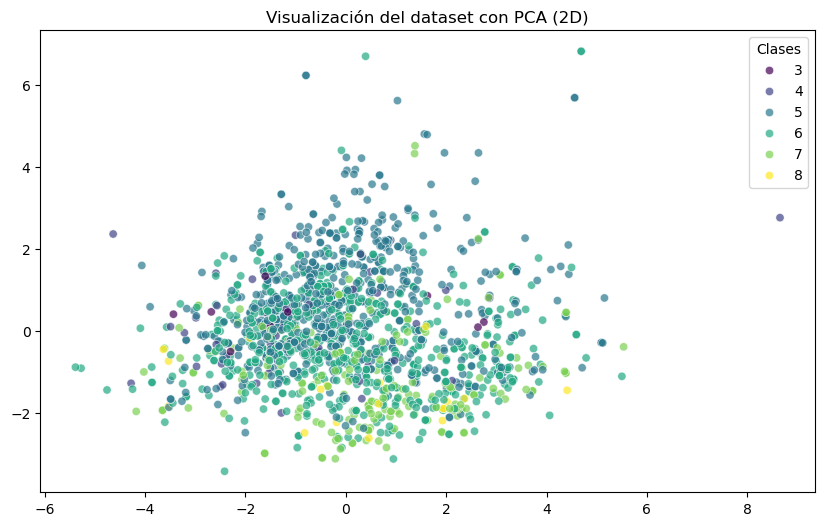

In [58]:
#Distribución de los datos en 2 Dimensiones
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca_2[:, 0], y=X_pca_2[:, 1], hue=y, palette='viridis', alpha=0.7)
plt.title('Visualización del dataset con PCA (2D)')

plt.legend(title='Clases')
plt.show()

Si realizamos una visualización de los conjuntos de datos al aplicar una **PCA** de 2 dimensiones (2D), podemos llegar a la conclusión de que con dos dimensiones no podemos separar correctamente las clases ya que parece que los datos se encuentran bastantes mezclados. Por lo tanto, será mandatorio aplicar **PCAs** con un mayor número de dimensiones. 

In [59]:
#Aplicamos PCA
pca5 = PCA(n_components = 5)
pcamle = PCA(n_components = 'mle') #Busca automaticamente el mejor numero

X_pca5 = pca5.fit_transform(X_scaled)
X_pcamle = pcamle.fit_transform(X_scaled)
print(f'El número de componentes seleccionados por MLE: {pcamle.n_components_}')

El número de componentes seleccionados por MLE: 10


Una vez aplicadas las **PCAs** dividimos los datos originales y los pasados por las **PCAs** en conjuntos de entrenamientos y prueba. Luego evaluamos los datos usando los mejores modelos del ejercicio anterior (**SVC** y **KNN** con *K-Fold* y *Stratified K-Fold*) cronometrandolos.

In [60]:
#Dividimos los datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size= 0.2, random_state= 13)
X_train_pca5, X_test_pca5, y_train, y_test = train_test_split(X_pca5, y, test_size= 0.2, random_state= 13)
X_train_pcamle, X_test_pcamle, y_train, y_test = train_test_split(X_pcamle, y, test_size= 0.2, random_state= 13)

In [61]:
#Definimos los modelos utilizando la mejor configuración obtenida en el ejercicio anterior y las validaciones cruzadas
modelos = {'SVC': SVC(C=10, kernel = 'rbf'), 'KNN': KNeighborsClassifier(n_neighbors=11, weights= 'distance')}

kf = KFold(n_splits=5, shuffle=True, random_state=13)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=13)

In [62]:
#Evaluamos los modelos con y sin la PCA
resultados = {}

for nombre, modelo in modelos.items():
    #Creamos el zip dentro del bucle
    conjuntos = zip(['Original', 'PCA_5', 'PCA_mle'],[(X_train, X_test), (X_train_pca5, X_test_pca5), (X_train_pcamle, X_test_pcamle)])
    
    for conjunto, (X_train_conjunto, X_test_conjunto) in conjuntos:
        #Comenzamos temporizador
        tiempo_start= time.time()

        #Hacemos validaciones cruzadas
        scores_kf = cross_val_score(modelo, X_train_conjunto, y_train, cv = kf, scoring = 'accuracy')
        scores_skf = cross_val_score(modelo, X_train_conjunto, y_train, cv = skf, scoring = 'accuracy')

        #Entrenamos el modelo final y obtenemos su precisión
        modelo.fit(X_train_conjunto, y_train)
        y_pred = modelo.predict(X_test_conjunto)
        precision_test = accuracy_score(y_test, y_pred)

        #Paramos temporizador
        tiempo_stop = time.time()
        tiempo_entrenamiento= tiempo_stop - tiempo_start

        #Guardamos los resultados en la biblioteca resultados
        resultados[(nombre, conjunto)] = {
        'kf_media_score' : np.mean(scores_kf),
        'skf_media_score' : np.mean(scores_skf),
        'precision_test': precision_test,
        'tiempo_entrenamiento': tiempo_entrenamiento
        }

In [63]:
#Mostramos los resultados de los modelos
for (modelo, conjunto), datos in resultados.items():
    print(f'{modelo} con {conjunto}: Accuracy KF={datos['kf_media_score']:.4f}, '
          f'Accuracy SKF={datos['skf_media_score']:.4f}, Accuracy Test={datos['precision_test']:.4f}, '
          f'Tiempo Entrenamiento={datos['tiempo_entrenamiento']:.4f} s')

SVC con Original: Accuracy KF=0.6193, Accuracy SKF=0.6388, Accuracy Test=0.6312, Tiempo Entrenamiento=1.2530 s
SVC con PCA_5: Accuracy KF=0.5880, Accuracy SKF=0.6028, Accuracy Test=0.6094, Tiempo Entrenamiento=1.2802 s
SVC con PCA_mle: Accuracy KF=0.6201, Accuracy SKF=0.6302, Accuracy Test=0.6312, Tiempo Entrenamiento=1.4668 s
KNN con Original: Accuracy KF=0.6607, Accuracy SKF=0.6560, Accuracy Test=0.6781, Tiempo Entrenamiento=0.1400 s
KNN con PCA_5: Accuracy KF=0.6341, Accuracy SKF=0.6458, Accuracy Test=0.6781, Tiempo Entrenamiento=0.0690 s
KNN con PCA_mle: Accuracy KF=0.6662, Accuracy SKF=0.6614, Accuracy Test=0.6781, Tiempo Entrenamiento=0.0940 s


A simple viste, podemos comprobar que el modelo **KNN** ofrece una precisión mayor en un tiempo mucho menor en comparación al modelo **SVC** por lo que podemos concluir que KNN es mejor modelo.

Una vez obtenidos los modelos, realizamos distantas gráficas con el fin de analizar en profundidad los resultados obtenidos.

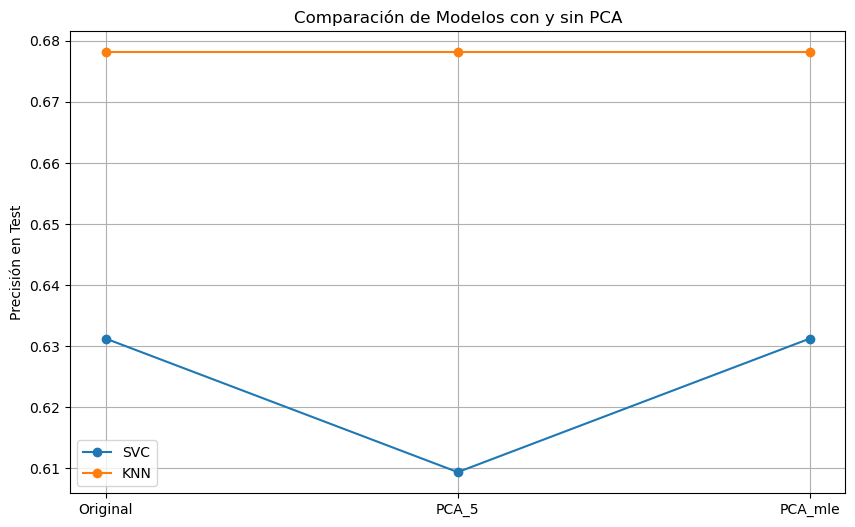

In [64]:
#Graficamos los resultados obtenidos
#Precisión
fig, ax = plt.subplots(figsize=(10, 6))

datasets = ['Original', 'PCA_5', 'PCA_mle']
for modelo in modelos.keys():
    test_accuracies = [resultados[(modelo, d)]['precision_test'] for d in datasets]
    ax.plot(datasets, test_accuracies, marker='o', label=modelo)

ax.set_ylabel('Precisión en Test')
ax.set_title('Comparación de Modelos con y sin PCA')
ax.legend()
plt.grid()
plt.show()

Como observamos en el ejercicio anterior, **KNN** tiene una precisión mayor que **SVC** e incluso la mantiene practicamente invariable aun aplicando previamente una **PCA**, no como en el caso de **SVC** que al aplicar la `PCA_5` se observa una caída de precisión, indicando que 5 componentes no son suficientes. 

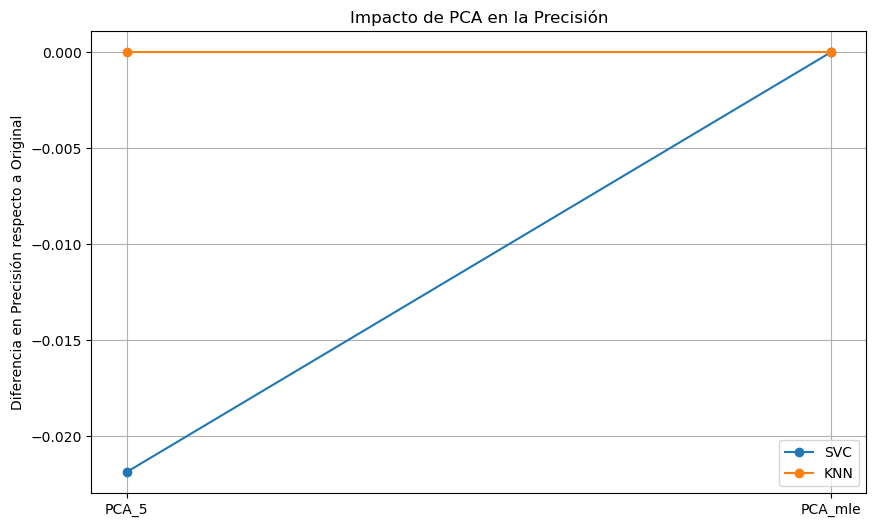

In [65]:
#Impacto en la precisión
fig, ax = plt.subplots(figsize=(10, 6))
for modelo in modelos.keys():
    precision_test = [resultados[(modelo, d)]['precision_test'] - resultados[(modelo, 'Original')]['precision_test'] for d in datasets[1:]]
    ax.plot(datasets[1:], precision_test, marker='o', label=modelo)

ax.set_ylabel('Diferencia en Precisión respecto a Original')
ax.set_title('Impacto de PCA en la Precisión')
ax.legend()
plt.grid()
plt.show()

Si analizamos el impacto de la precisión con respecto al Original al aplicar la **PCA**, observamos como la `PCA_5` de **SVC** tiene una caída fuerte de precisión que se recupera cuando en su lugar aplicamos `PCA_mle`, volviendo a su valor original. En contraposición, **KNN** no muestra variación alguna en su precisión al reducir sus dimensiones.

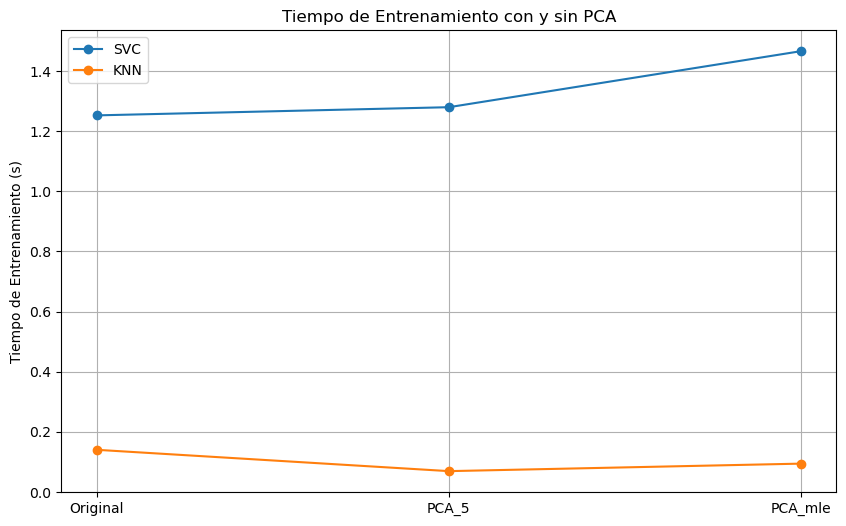

In [66]:
#Graficamos los tiempos de entrenamiento
fig, ax = plt.subplots(figsize=(10, 6))

for modelo in modelos.keys():
    train_times = [resultados[(modelo, d)]['tiempo_entrenamiento'] for d in datasets]
    ax.plot(datasets, train_times, marker='o', label=modelo)

ax.set_ylabel('Tiempo de Entrenamiento (s)')
ax.set_title('Tiempo de Entrenamiento con y sin PCA')
ax.legend()
plt.grid()
plt.show()

En esta gráfica podemos observar como en ambos modelos, al reducir el número de dimensiones, se reduce el tiempo de entrenamiento. Sin embargo, el tiempo del modelo **KNN** es mucho menor en todos los casos, siendo cerca de un $90\%$ más rapido con respecto a **SVC**.

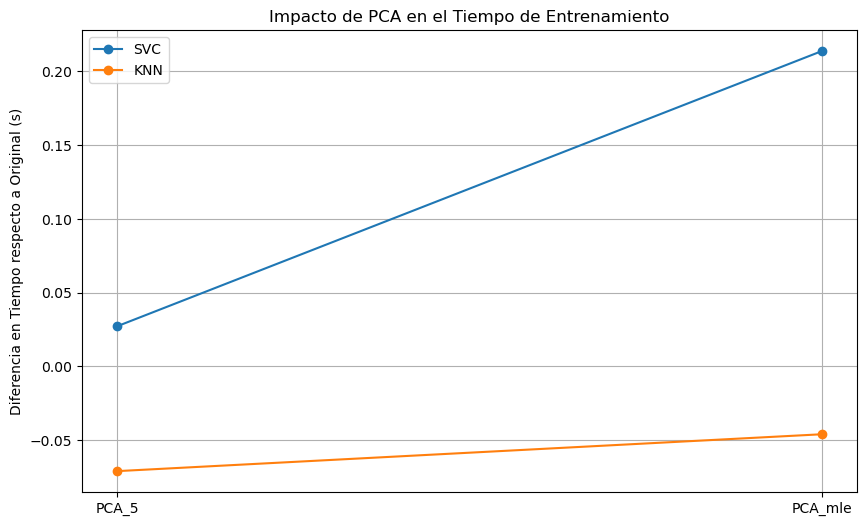

In [67]:
fig, ax = plt.subplots(figsize=(10, 6))
for modelo in modelos.keys():
    tiempo_diff = [resultados[(modelo, d)]['tiempo_entrenamiento'] - resultados[(modelo, 'Original')]['tiempo_entrenamiento'] for d in datasets[1:]]
    ax.plot(datasets[1:], tiempo_diff, marker='o', label=modelo)

ax.set_ylabel('Diferencia en Tiempo respecto a Original (s)')
ax.set_title('Impacto de PCA en el Tiempo de Entrenamiento')
ax.legend()
plt.grid()
plt.show()

Al analizar el impacto de la PCA en el tiempo se observa que para **SVC** la mejora del tiempo es muy leve al redimensionar los datos. Para **KNN** sucede lo contrario, ya que al aplicar `PCA_5` se reduce dráticamente el tiempo de entrenamiento, aunque se recupera cuando se aplica `PCA_mle`.

Por lo tanto, podemos concluir con que el modelo **KNN** posee una mayor precisión que el modelo **SVC** con un tiempo de entrenamiento mucho menor. Y que incluso al aplicarle una **PCA** podemos disminuir aún más ese tiempo sin sacrificar prácticamente nada de precisión, convirtiendolo, para este dataset, en un mejor modelo clasificador que **SVC**.

### EJERCICIO 3

Sobre el dataset del ejercicio 1, utiliza Árboles de Decisión para graficar los parámetros más importantes del dataset escogido. Crea distintos árboles modificando los hiperparámetros de modelo más importantes (como p.e. el max_depth, min_samples_leaf... y otros). Evalúa 

Graficar los resultados de al menos 4 árboles, optimizando distintos tipos de parámetros

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold, StratifiedKFold
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

Una vez importados los módulos necesarios, separamos los conjuntos de datos. En el caso de los **Árboles de Decisiones** no es necesario reescalar los datos ya que toman decisiones basadas en comparaciones no en magnitudes absolutas. Luego, creamos un grid para realizar varios **Árboles de Decisiones** usando **GridSearchCV**. De esta forma, podemos buscar los mejores hiperparámetros para aplicar el modelo.

In [69]:
#Separamos los datos en conjuntos de prueba y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [70]:
#Definimos nuestro modelo de arbol de decisiones y el espacio de búsqueda con param_grid
modelo= DecisionTreeClassifier(random_state=13)

param_grid = {
    'max_depth': [None, 3, 5, 10],
    'min_samples_leaf': [1, 5, 10, 20],
    'criterion': ['gini', 'entropy']
}

In [71]:
#Realizamos el GridSearch 
grid_search = GridSearchCV(modelo, param_grid, cv=5, scoring='accuracy', n_jobs=-1, return_train_score=True)
grid_search.fit(X_train, y_train)

#Juntamos los resultados en un solo dataframe
arboles= pd.DataFrame(grid_search.cv_results_)
arboles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   mean_fit_time           32 non-null     float64
 1   std_fit_time            32 non-null     float64
 2   mean_score_time         32 non-null     float64
 3   std_score_time          32 non-null     float64
 4   param_criterion         32 non-null     object 
 5   param_max_depth         24 non-null     object 
 6   param_min_samples_leaf  32 non-null     int32  
 7   params                  32 non-null     object 
 8   split0_test_score       32 non-null     float64
 9   split1_test_score       32 non-null     float64
 10  split2_test_score       32 non-null     float64
 11  split3_test_score       32 non-null     float64
 12  split4_test_score       32 non-null     float64
 13  mean_test_score         32 non-null     float64
 14  std_test_score          32 non-null     floa

In [72]:
y_pred = (grid_search.predict(X_test))
precision = accuracy_score(y_test,y_pred)
precision

0.628125

Una vez hemos calculado los 32 posibles **Árboles**, limpiamos el DataFrame para quedarnos solo con las variables que nos interesan. Una vez hecho esto, analizamos el riesgo de Overfitting: si la diferencia entre la puntiación de los conjuntos de prueba y entrenamiento es mayor de $0.1$ estaremos entrando en riesgo de overfitting, por lo que eliminamos del DataFrame aquellos que estén por encima de este umbral. Una vez hecho esto, mostramos y graficamos aquellos $10$ con mayor precisión.

In [73]:
#Nos quedamos con los resultados que nos interesa del dataframe y lo reorganizamos
arboles = arboles[['param_max_depth', 'param_min_samples_leaf', 'param_criterion', 'mean_test_score', 'mean_train_score']]

#Analizamos el riesgo de overfitting si la diferencia entre la puntuacion de los conjuntos es > 0.1 podría fallar con datos nuevos
arboles['Riesgo de Overfitting'] = arboles['mean_train_score']-arboles['mean_test_score']


mejores = arboles[arboles['Riesgo de Overfitting'] < 0.1]
mejores = mejores.sort_values(by = 'mean_test_score', ascending = False )
mejores = mejores.reset_index(drop = True)
mejores10 = mejores.head(10)

print(mejores10)

  param_max_depth  param_min_samples_leaf param_criterion  mean_test_score  \
0               5                      20            gini         0.569213   
1               5                      10            gini         0.568422   
2            None                      20         entropy         0.566042   
3              10                      20         entropy         0.566042   
4               3                      20            gini         0.558263   
5               5                      20         entropy         0.557439   
6               5                       5         entropy         0.552760   
7               5                      10         entropy         0.551195   
8               3                      10            gini         0.550450   
9               3                       1            gini         0.545744   

   mean_train_score  Riesgo de Overfitting  
0          0.645621               0.076409  
1          0.656958               0.088535  
2     

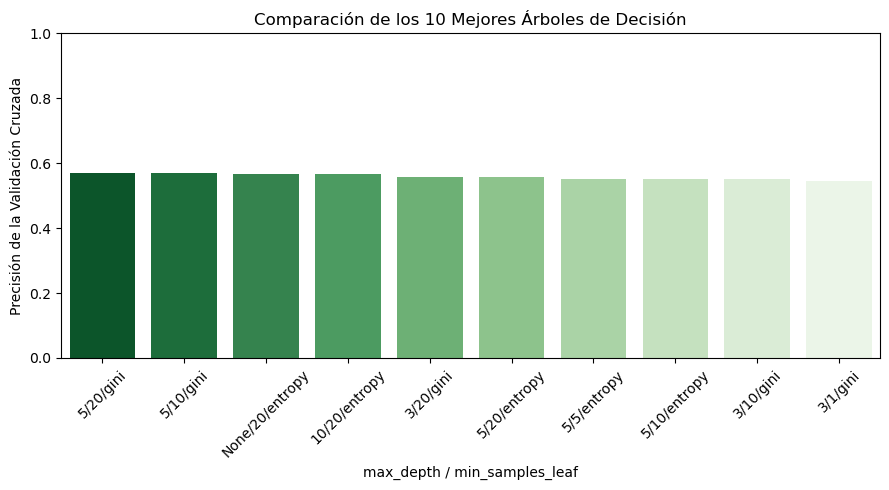

In [74]:
#Graficamos los arboles segun el criterio

fig= plt.figure(figsize=(9,5))

sns.barplot(
    x = mejores10['param_max_depth'].astype(str) + '/' + mejores10['param_min_samples_leaf'].astype(str) + '/' + mejores10['param_criterion'].astype(str),
    y = mejores10['mean_test_score'],
    palette='Greens_r'
)


plt.xlabel('max_depth / min_samples_leaf')


plt.ylabel('Precisión de la Validación Cruzada')
plt.xticks(rotation=45)
plt.ylim(0,1)
plt.title('Comparación de los 10 Mejores Árboles de Decisión')

plt.tight_layout()
plt.show()

Tanto en la gráfica como en la tabla se puede observar las combinaciones de hiperparámetros para cada uno de los **Árboles de Decisiones** realizados. Es remarcable como la precisión de cada uno de ellos se encuentra por debajo del 0.6 lo que indicaría que los modelos no son capaces de realizar la clasificación con una precisión deseable, resultado que se ha indicado con anterioridad en otro ejercicio. La posibilidad de ello venga de que tiene que realizar la clasificación de varias valores de la variable `quality`. Una solución que se plantea para futuras revisiones es que se transforme la variable `quality`en **binaria** indicando exclusivamente si el vino es de alta calidad (si se encuentra por encima de un valor concreto $= 1$) o de baja calidad (por debajo de ese valor concreto $= 0$). De esta forma se mejoraría probablemente la precisión en la clasificación a costa de simplificar las clases.

Para finalizar, comprobaremos la importancia de cada una de las características para los 4 mejores **Árboles**.

In [75]:
#Modelizamos los mejores arboles 
mejores_arboles = []

for i in range(4):
    params = mejores10.iloc[i]
    modelo = DecisionTreeClassifier(
        max_depth=params['param_max_depth'],
        min_samples_leaf=params['param_min_samples_leaf'],
        criterion=params['param_criterion'],
        random_state=13
    )
    modelo.fit(X_train, y_train)
    mejores_arboles.append((params, modelo))

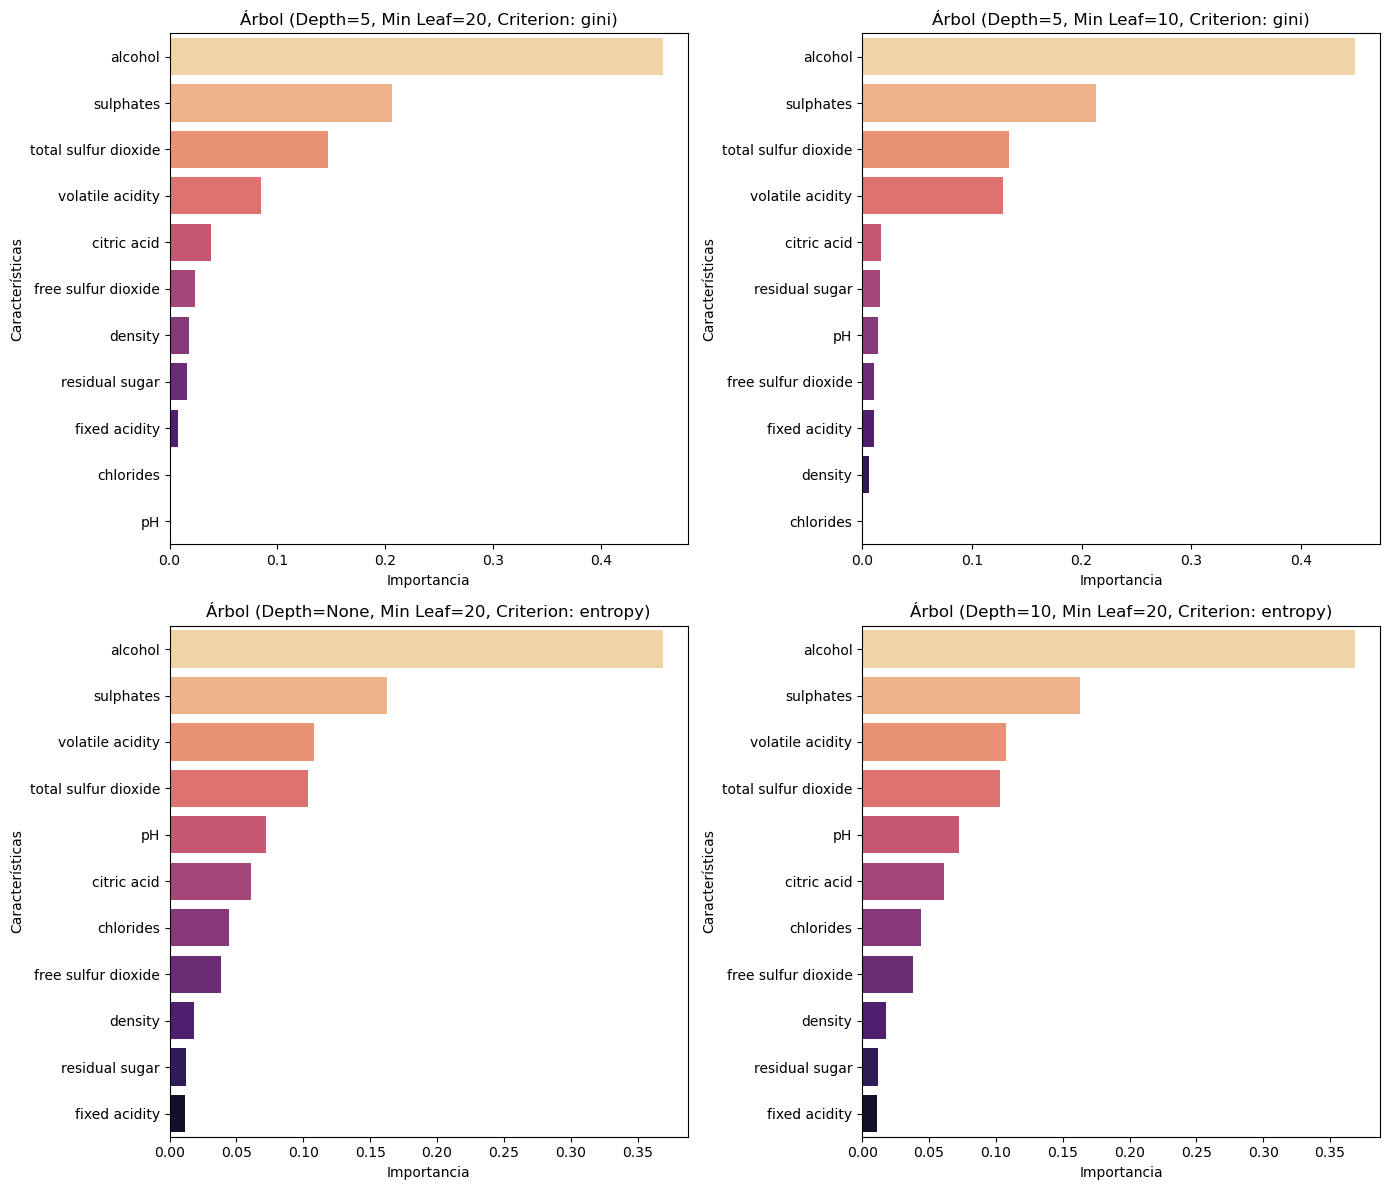

In [76]:
#Grafiamnos la importancia de los 4 mejores modelos

fig, ax = plt.subplots(2, 2, figsize=(14, 12))
for ax, (params, modelo) in zip(ax.flatten(), mejores_arboles):
    importancia = modelo.feature_importances_
    df_importancia = pd.DataFrame({
        "Características": X_train.columns,
        "Importancia": importancia
    }).sort_values(by="Importancia", ascending=False)

    sns.barplot(x="Importancia", y="Características", data=df_importancia, palette="magma_r", ax=ax)
    ax.set_title(f'Árbol (Depth={params['param_max_depth']}, Min Leaf={params['param_min_samples_leaf']}, Criterion: {params['param_criterion']})')
    ax.set_xlabel("Importancia")
    ax.set_ylabel("Características")

plt.tight_layout()
plt.show()

Para los 4 árboles, la característa más importante es `alcohol` seguida de `sulphates`. Después de estas, las dos características más importantes `total sulfur dioxide` y `volatile acidity`. Aunque los *árboles superiores* le dan más importancia al `total sulfur dioxide`, lo dos *árboles inferiores* se lo dan a `volatile acidity` por lo que es complicado indicar el orden de importancia entre ellas dos. En cuanto al resto de carácterísticas, si bien los *árboles superiores* no les dan mucha relevancia, los inferiores sí. Esto puede ser debido a que al usar el criterio `entropy` se logre más profundidad y detalle de las características menos relevantes. Por ejemplo la característica `pH`cobra mucha más importancia cuando se usa `entropy`que cuando se usa `gini`.

### EJERCICIO 4

El fichero datos_pago_microcreditos.csv contiene 30000 transacciones bancarias relativas al pago o impago de microcreditos. El dataset consta de 62 dimensiones propietarias de las cuales el banco no ha proporcionado informacion por confidencialidad, a parte de su valor. La matriz de entrada se encuentra en x_train, e y_train contiene la etiqueta relativa a esa transaccion, un 1 indica que si se pagó el microcredito y un 0 que no se pagó.

Considera que el tamaño del dataset es lo suficientemente grande como para, dependiendo de los recursos de la maquina, poder tardar varias horas en entrenar modelos complejos. Usando verbose=4 durante el fit para la optimización de parámetros podras ver el tiempo que tarda cada fit. El valor del parámetro 'verbose' es un número entero que indica el nivel de detalle de la información que se desea mostrar durante el entrenamiento del modelo.

Ejecuta el código inicial para estandarizar los datos y contesta las preguntas bajo este código.

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold, StratifiedKFold
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [78]:
data_file='datos_pago_microcreditos.csv'

pdl=pd.read_csv(data_file)

In [79]:
pdl['payment']=np.where(pdl['payment']=='Success',1,0)

k=pdl.columns

for col in k:
    if pdl[col].dtype=='object':
        temp=pd.get_dummies(pdl[col],drop_first=True,prefix=col)
        pdl=pd.concat([pdl,temp],axis=1)
        pdl.drop([col],axis=1,inplace=True)


pdl.dropna(axis=0,inplace=True)

In [80]:
pdl_train, pdl_test = train_test_split(pdl, test_size = 0.2,random_state=2)

#x_train=pdl_train.drop(['payment'],1)
x_train=pdl_train.drop(columns='payment')
y_train=pdl_train['payment']

#x_test=pdl_test.drop(['payment'],1)
x_test=pdl_test.drop(columns='payment')
y_test=pdl_test['payment']

x_train.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)

In [81]:
y_train

0        0
1        1
2        0
3        0
4        1
        ..
23995    0
23996    1
23997    0
23998    0
23999    1
Name: payment, Length: 24000, dtype: int32

Usando RandomSearchCV, identifica para un clasificador KNN el resultado óptimo usando como scoring de la optimizacion el area bajo la curva (roc_auc) y con 10 folds para la validacion cruzada. Presenta los parametros optimos y evalúa el clasificador optimo con esos parámetros. Obten la matriz de confusión del clasificador optimo anterior. ¿Cómo lees cada uno de los valores? ¿Qué valor de precision y recall tiene el clasificador optimizado con roc_auc?

Compara los resultados anteriores con un GradientBoostingClasifier, que es uno de los métodos de scikitlearn que suele producir resultados bastante adecuados. Implementa un clasificador utilizando GradientBoostingClasifier considerando 0.05, 0.1, 0.15, 0.2, 0.25, 0.3 como learning rate.¿qué learning rate produce un resultado optimo usando roc_auc como métrica?

Expón la matriz de confusión de los dos casos y coméntala.

In [82]:
import pandas as pd
import numpy as np
import time 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report

Importamos el resto de módulos que necesitamos y que no se ha importado hasta ahora. Como los datos ya se encuentran separados en conjuntos de prueba y de entrenamiento, lo que resta es escoger los hiperparámetros que queremos usar para el **KNN Classifier**. Una vez escogidos los hiperparámetros y una técnica de validación cruzada (*Stratified K-Fold*) aplicamos **RandomizedSearchCV**, cronometrándolo, el cual realiza combinaciones aleatorias de los hiperparámetros evitando calcular todas las combinaciones posibles para ahorrar tiempo de computación. Esta técnica es útil cunado se tiene grandes conjuntos de datos ,muchos hiperparámetros o hiperparámetros continuos como puede ser el `learning_rate` de **Gradient Boosting** o el número de vecinos en **KNN**.

In [83]:
#Definimos los hiperparámetros para KNN
param_knn = {
    'n_neighbors': np.arange(1, 31),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

In [84]:
#Configuramos el RandomizedSearchCv con KNN
knn = KNeighborsClassifier()
skf = StratifiedKFold(n_splits=10, shuffle= True, random_state=13)

random_search_knn = RandomizedSearchCV(
    knn, param_distributions=param_knn, 
    n_iter=20, cv=skf, scoring='roc_auc', n_jobs=-1, verbose = 4, random_state=13
)

In [85]:
#Entrenamos el modelo cronometrandolo
tiempo_start = time.time()
random_search_knn.fit(x_train, y_train)
tiempo_stop = time.time()
crono=tiempo_stop - tiempo_start
print(f'El modelo tarda {crono:.4f}s en realizarse')

Fitting 10 folds for each of 20 candidates, totalling 200 fits
El modelo tarda 37.3362s en realizarse


In [86]:
#Mostramos los mejores parámetros y evaluamos el modelo
mejor_knn = random_search_knn.best_estimator_
y_pred_knn = mejor_knn.predict(x_test)
y_pred_proba_knn = mejor_knn.predict_proba(x_test)[:, 1]

knn_auc = roc_auc_score(y_test, y_pred_proba_knn)
knn_conf_matriz = confusion_matrix(y_test, y_pred_knn)
knn_informe_class = classification_report(y_test, y_pred_knn, output_dict=True)

#Comprobamos si hay overfitting y underfitting
print("Diferencia entre entrenamiento y test AUC:", random_search_knn.best_score_ - knn_auc)

Diferencia entre entrenamiento y test AUC: -0.003217550891746801


Una vez hemos aplicado el modelo, nos quedaremos con el que mejor haga la clasificación analizando previoamente si hay Overfitting. Como el valor es muy próximo a $0$, podemos concluir que no existe el Overfitting ($> 0.05$). A continuación, entrenamos GradientBoost Classifier para poder realizar una comparación entre ambos métodos.

In [87]:
#Entrenamos GradientBoostingClassifier con diferentes learning rates y cronometrandolo
learning_rates = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
gb_resultados = {}

tiempo_start_gbc = time.time()
for i in learning_rates:
    gbc = GradientBoostingClassifier(learning_rate=i, random_state=13)
    gbc.fit(x_train, y_train)
    
    y_pred_gbc = gbc.predict(x_test)
    y_pred_proba_gbc = gbc.predict_proba(x_test)[:, 1]
    
    auc = roc_auc_score(y_test, y_pred_proba_gbc)
    gb_resultados[i] = {'modelo': gbc, 'roc_auc': auc, 'conf_matriz': confusion_matrix(y_test, y_pred_gbc), 'informe_class': classification_report(y_test, y_pred_gbc, output_dict=True)}
tiempo_stop_gbc = time.time()

cronogbc = tiempo_stop_gbc - tiempo_start_gbc

In [88]:
#Buscamos el mejor learning rate para Gradient Boosting
mejor_lr = max(gb_resultados, key=lambda x: gb_resultados[x]['roc_auc'])
mejor_gbc = gb_resultados[mejor_lr]['modelo']
gbc_auc = gb_resultados[mejor_lr]['roc_auc']
gbc_conf_matriz = gb_resultados[mejor_lr]['conf_matriz']
gbc_informe_class = gb_resultados[mejor_lr]['informe_class']

In [89]:
#Comparación entre ambos métodos
print(f'Mejor KNN: {random_search_knn.best_params_} con AUC = {knn_auc:.4f}')
print(f'Mejor Gradient Boosting: learning_rate = {mejor_lr} con AUC = {gbc_auc:.4f} \n')

print(f'KNN - Precisión: {knn_informe_class['1']['precision']:.4f}, Recall: {knn_informe_class['1']['recall']:.4f}, F1-score: {knn_informe_class['1']['f1-score']:.4f}, Tiempo: {crono:.4f}s')
print(f'Gradient Boosting - Precisión: {gbc_informe_class['1']['precision']:.4f}, Recall: {gbc_informe_class['1']['recall']:.4f}, F1-score: {gbc_informe_class['1']['f1-score']:.4f}, Tiempo: {cronogbc:.4f}s')

Mejor KNN: {'weights': 'distance', 'n_neighbors': 28, 'metric': 'manhattan'} con AUC = 0.8034
Mejor Gradient Boosting: learning_rate = 0.15 con AUC = 0.8908 

KNN - Precisión: 0.7407, Recall: 0.4531, F1-score: 0.5622, Tiempo: 37.3362s
Gradient Boosting - Precisión: 0.8343, Recall: 0.8052, F1-score: 0.8195, Tiempo: 102.8632s


En el texto superior tenemos los hiperparámetros del mejor modelo para **KNN ('weights': distance, 'n_neighbors': 28, 'metric': manhattan)** y para **Gradient Boosting (learning_rate = 0.15)**. El *Área bajo la curva ROC (ROC AUC)* representa como de bueno es un modelo a la hora de discriminar a que clase pertenece la muestra. Un valor cercano a $1.00$ indica una exelente clasificación. En el caso de **KNN** ($ROC\_AUC = 0.8034$) existe un $80,34\%$ de posibilidades de que el modelo clasifique bien la muestra, mientras que para **Gradient Boosting** ( $ROC\_AUC = 0.8908$) la posibilidad es del $89.08\%$, convirtiendolo en un modelo clasificador mejor que **KNN**.

Continuando el análisis, podemos comparar los valores de *Precisión* y *Recall* los cuales representan el porcentaje de predicciones positivas fueron correctas y que porcentaje de instancias positivas fueron identificadas correctamente respectivamente. Ambas métricas son superiores para **Gradient Boosting**, especialmente *Recall* la cual es casi el doble que para **KNN**. Esto implica que **Gradient Boosting** tiene menor número de falsos positivos y que detecta más positivos que **KNN**, a pesar de que este segundo tiene un menor tiempo de entrenamiento.

Para finalizar, graficaremos en un mapa de calor las matrices de confusión de cada modelo para analizarlas.

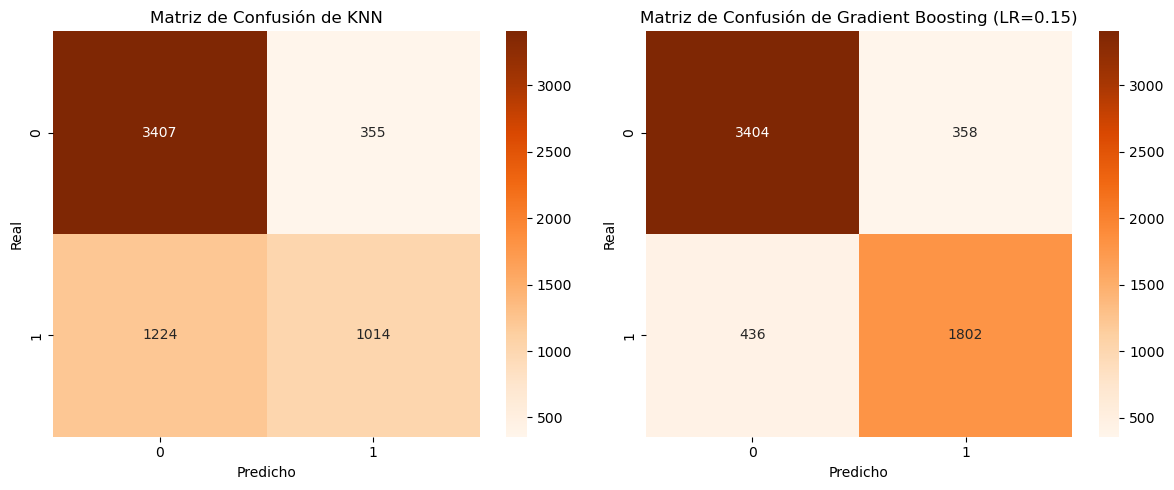

In [90]:
#Graficamos matrices de confusión
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# KNN
sns.heatmap(knn_conf_matriz, annot=True, fmt='d', cmap='Oranges', ax=ax[0])
ax[0].set_title('Matriz de Confusión de KNN')
ax[0].set_xlabel('Predicho')
ax[0].set_ylabel('Real')

# Gradient Boosting
sns.heatmap(gbc_conf_matriz, annot=True, fmt='d', cmap='Oranges', ax=ax[1])
ax[1].set_title(f'Matriz de Confusión de Gradient Boosting (LR={mejor_lr})')
ax[1].set_xlabel('Predicho')
ax[1].set_ylabel('Real')

plt.tight_layout()
plt.show()

En las matrices de confusión, las posiciones $[0,0]$ y $[1,1]$ indican los Verdaderos Negativos y los Verdaderos Positivos, mientras que las posiciones $[0,1]$ y $[1,0]$ representan los Falsos Positivos y los Falsos Negativos respectivamente. Teniendo esto en cuenta, ambos modelos son capaces de predecir de igual forma los Casos Negativos con pocos falsos positivos. Sin embargo, para **KNN** hay una gran cantidad de Falsos Negativos al identificar Casos Positivosen comparación con **Gradient Boosting**, el cual tiene casi $800$ Verdaderos Positivos más. Esta dificultad a la hora de detectar los Casos Positivos viene representado en el bajo *Recall* de este modelo, tal y como se comentó anteriormente.

Podemos concluir que, aunque **KNN** sea más rápido y detecte igual de bien los Verdaderos Negativos, la mayor *Precisión* y *Recall*, así como la mejor detección de positvos hace de **Gradient Boosting** un modelo superior para este conjunto de datos.

### EJERCICIO 5

El dataset winequality-red.csv, utilizado en el ejercicio 1, es un dataset que contiene para los vinos de la denominación de origen Minho una serie de métricas donde se caracterizan diferentes tipos de vinos. Entre estos valores se encuentran el pH, su densidad, el nivel de alcohol o su calidad (potencialmente de 1 a 8). En este ejercicio usaremos este dataset para probar diferentes técnicas de clustering

In [91]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

myfile='winequality-red.csv'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

wine=pd.read_csv(myfile,sep=';')

print(wine.head())
print(wine.columns)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

Utilizando solo las columnas 'sulphates','alcohol','pH', y usando KMeans identifica el numero optimo de clusters para el conjunto de datos utilizando la 'inertia_' para medir la compacidad de los clusteres.

Usando los 'cluster_centers_' del clustering optimo. ¿qué dicen estos representantes de clase de cada cluster? ¿cuáles son los valores de los indices de Davies-Bouldin y de Silhouette para este conjunto de clusters?

In [92]:
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score, silhouette_score


Una vez importado los modulos necesarios, nos quedamos exclusivamente con las variables que se nos pide `sulphates`,`alcohol` y `pH`. Una vez separadas, preprocesamos los datos y utilizamos el **Método del Codo** para averiguar el número correcto de *grupos (clusters)*. Este método consiste en calcular la *incercia (inertia)* de los *clusters* obtenidos por **K-Means** y se grafica. El punto donde la *inercia* deja de disminuir significativamente es el *codo* de la curva e indica el posible mejor número de *clusters*.

In [93]:
#Guardamos las variables que nos piden exclusivamente y escalamos los datos
vinos= wine[['sulphates','alcohol', 'pH']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(vinos)

In [94]:
#Buscamos el número óptimo de clusters usando la incercia
inercia = []

K_range = range(2,round(np.sqrt(wine.shape[0]/2))) #La raiz de la mitad de muestras es el máximo rango correcto para calcular K-means

for k in K_range:
    kmeans = KMeans(n_clusters = k, n_init= 10, random_state = 13)
    kmeans.fit(X_scaled)
    inercia.append(kmeans.inertia_)

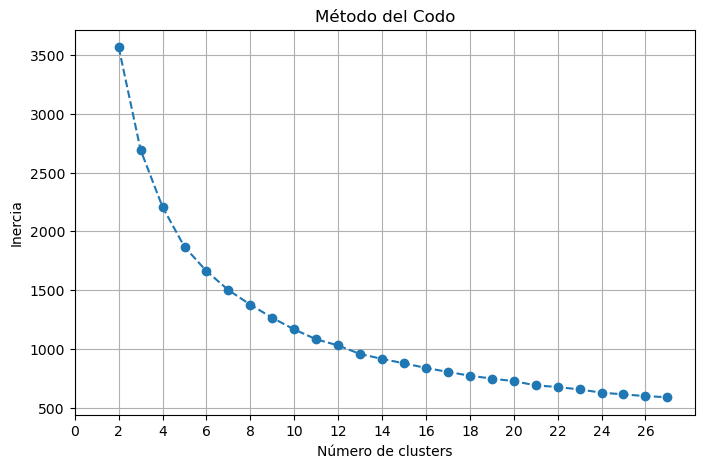

In [95]:
#Graficamos la inercia para aplicar el Método del Codo
plt.figure(figsize=(8,5))
plt.plot(K_range, inercia, marker='o', linestyle='--')

plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.xticks(range(0,round(np.sqrt(wine.shape[0]/2)),2))
plt.grid()
plt.show()

En el gráfico superior se observa la curva de la *inercia* en función del número de *clusters*. Al ser complicado hallar el punto exacto donde la cruvba deja de decrecer significativamente, instalaremos el módulo **`kneed`**, el cual posee una función que obtiene el número de *clusters* óptimo. Posteriormente, entrenaremos el modelo.

In [96]:
#Buscamos el mejor K con KneeLocator
!pip install kneed

In [97]:
from kneed import KneeLocator

knee = KneeLocator(K_range, inercia, curve="convex", direction="decreasing")
k_optimo = knee.knee

print(f"El número óptimo de clusters según el Método del Codo es: {k_optimo}")

#Entrenamos el modelo con el k óptimo
kmeans_optimo= KMeans(n_clusters= k_optimo, n_init=10, random_state=13)
wine['cluster'] = kmeans_optimo.fit_predict(X_scaled)

El número óptimo de clusters según el Método del Codo es: 8


Una vez entrenado, podemos calcular los centros de los *clusters* y el valor del **Índice de Davies-Bouldin** y la **Silhouette Score**.

In [98]:
centros_clusters = scaler.inverse_transform(kmeans_optimo.cluster_centers_)
centros = pd.DataFrame(centros_clusters, columns= ['sulphates', 'alcohol', 'pH'])

In [99]:
print('Centros de los clusters', '\n', '\n', centros)

Centros de los clusters 
 
    sulphates    alcohol        pH
0   0.705879  10.030486  3.119799
1   0.638565   9.709845  3.471857
2   1.271739   9.526087  3.092391
3   0.657385  12.500256  3.624154
4   0.843514  10.994595  3.303568
5   0.547506   9.596394  3.262494
6   0.643252  12.188344  3.240429
7   0.599283  10.958035  3.409243


In [100]:
#Calculamos los Davies-Bouldin Index y Silhouette Score
db_index = davies_bouldin_score(X_scaled, wine['cluster'])
silhouette_avg = silhouette_score(X_scaled, wine['cluster'])

print(f" Davies-Bouldin Index: {db_index:.4f}")
print(f" Silhouette Score: {silhouette_avg:.4f}")                  

 Davies-Bouldin Index: 1.0749
 Silhouette Score: 0.2679


El **Índice de Davies-Bouldin** mide la compacidad y separación de los *clusters* con valores de $0$ a $2$. Cuanto menor es el valor mejor es el *clustering*. Para valores cercanos a $0$ se considera que estan muy bien separados los *clusters*, entre $0,5$ y $1.5$ existe una buena separación entre los *clusters* y cercano o por encima de $2$ los *clusters* no están bien definidos. Por lo que para este caso ($1.0749$) podemos decir que están bien definidos pero podría ser mejor. 

Por otro lado  **Silhouette Score** mide qué tan cerca están los puntos dentro de un *cluster* y que tan lejor están de los otros *clusters*. Para valores cercanos a $1$ los *clusters* están bien separados y compactos, para valores cercanos a $0$ muchos puntos están cerca de los bordes de los clusters y para valores inferiores a $0$, hay puntos en *clusters* incorrectos. Por lo que para este caso ($0.2679$) los puntos están muy separados del centro de los clusters.

Para corroborar estos datos, vamos a graficar los clusters en 3D.

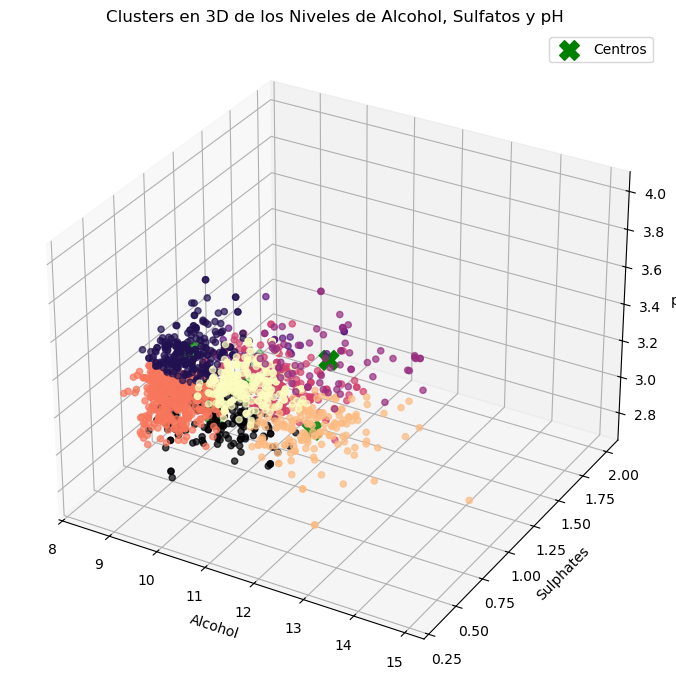

In [101]:
#Graficamos los clusters que hemos calculado
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7)) 
ax = fig.add_subplot(111, projection ='3d')
#Los puntos de los clusters
scatter = ax.scatter(wine['alcohol'], wine['sulphates'], wine['pH'], c=wine['cluster'], cmap="magma", alpha=0.7)
#Los centros de los clusters
ax.scatter(centros['alcohol'], centros['sulphates'], centros['pH'], color='green', marker='X', s=200, label='Centros')

ax.set_xlabel('Alcohol')
ax.set_ylabel('Sulphates')
ax.set_zlabel('pH')
ax.set_title('Clusters en 3D de los Niveles de Alcohol, Sulfatos y pH')
plt.tight_layout()
plt.legend()
plt.show()

Comparando el gráfico con los valores obtenidos para **Índice de Davies-Bouldin** y **Silhouette Score** podemos confirmar lo previamente analizado. Los clusters se encuentran bien definidos pero hay mucha superposición de colores indicando que no separa bien los datos al parecer un solo grupo grande. Esto podría ser inidcativo de que **K-means** no sea la mejor opción para este caso.

Abajo se encuentra un representación tridimensional interactiva de los *clusters* con la finalidad de poder obsrvarlos mejor.

In [102]:
import plotly.express as px

#Creamos un dataframe con los clusters como categorias
wine['Clusters_cat'] = wine['cluster'].astype(str)

#Creamos un gráfico 3D interactivo
fig = px.scatter_3d(wine, x = 'alcohol', y = 'sulphates', z = 'pH',
                    color = 'Clusters_cat', title = 'Clusters en 3D de los Niveles de Alcohol, Sulfatos y pH',
                    opacity = 0.5, symbol_sequence = ['circle'], color_discrete_sequence = px.colors.sequential.Magma)

#Reducimos el tamaño de los puntos
fig.update_traces(marker=dict(size=3))

#Añadimos los centros de los clusters
centros['Clusters_cat'] = ['Centro' + str(i) for i in range(len(centros))]
fig.add_trace(px.scatter_3d(centros, x = 'alcohol', y= 'sulphates', z = 'pH',
                            color_discrete_sequence = ['green'], symbol_sequence = ['x']).data[0])

### EJERCICIO 6

El fichero hr_train.cvs contiene una tabla sobre los empleados de una empresa. Entre otros incluye información de su nivel de satisfacción, de la última evaluación obtenida, del numero de proyecto en el que se encuentra, del número medio de horas por semana, del número de años que lleva en la compañía, si ha tenido o no un accidente en el trabajo, si se ha ido (left) de la compañia, si ha tenido una promocion en los ultimos 5 años, y por último su nivel salarial (descrito como medio, alto o bajo) y el departamento en que se encuentra (sales/technnical ...)

**El departamento de RRHH esta solicitando un clasificador que pueda predecir si alguien esta en riesgo de irse de la compañia para poder actuar  proactivamente.**

Notas:
- La columna 'left' indica si alguien se ha ido de la compañia, es la 'y' del problema.
- Las columnas 'sales' y 'salary' son alfanuméricas. La mayoría de clasificadores (aunque no todos) no trabajan bien con este tipo de variables y requieren valores numéricos. Dado el caso dispones de diferentes alternativas: (1) eliminar esas columnas y trabajar con el resto o (2) traducir esas columnas en columnas binarias - por ejemplo si 'salary' tiene tres valores eliminar la columna original y sustituirla por tres columnas salary_low, salary_medium, salary_high donde se pondra un 1 en el tipo de salario y un 0 en las otras dos columnas restantes. Lo mismo para 'sales', donde se transformara esa columna en tantas columnas como departamentos y un 1 en el departamento en que se encuentre el trabajador. Este es un preproceso muy tipico.

Nota de evaluación:

En este ejercicio más que el resultado final, se evaluarán los pasos y el razonamiento utilizado en cada decisión que se toma para la implementación del modelo. 

In [103]:
import pandas as pd
import numpy as np

file1=r'hr_train.csv'

ci=pd.read_csv(file1)
ci.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.42             0.46               2                   150   
1                0.66             0.77               2                   171   
2                0.55             0.49               5                   240   
3                0.22             0.88               4                   213   
4                0.20             0.72               6                   224   

   time_spend_company  Work_accident  left  promotion_last_5years      sales  \
0                   3              0     1                      0      sales   
1                   2              0     0                      0  technical   
2                   3              0     0                      0  technical   
3                   3              1     0                      0  technical   
4                   4              0     1                      0  technical   

   salary  
0  medium  
1  medium  
2    high  
3  medium  
4  medium

In [104]:
ci.left.value_counts()

left
0    7424
1    3075
Name: count, dtype: int64

In [105]:
ci.salary.value_counts()

salary
low       5104
medium    4515
high       880
Name: count, dtype: int64

In [106]:
ci.sales.value_counts()

sales
sales          2935
technical      1890
support        1556
IT              825
product_mng     639
marketing       614
hr              532
RandD           530
accounting      527
management      451
Name: count, dtype: int64

In [107]:
import pandas as pd
import numpy as np
import time 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder

Importamos los modulos necesarios y transformamos las variables `sales` y `salary` en diferentes columnas binarias con la finalidad de mejorar la clasificación pues utilizaremos un modelo **Random Forest Classifier** para hacer la clasificación y no acepta variables no numéricas. A la hora de hacer estas columnas podríamos eliminar pues teniendo la información de las otras dos podemos obtener la tercera, es decir, en el caso de `salary` crear las 3 columnas `salary_low`, `salary_medium` y `salary_high` podríamos eliminar una de ellas ya que si tanto el salario bajo y medio es $0$, implicaría que el salario debe ser alto pues no acepta otra posibilidad. De esta forma se evita tener información duplicada en varias variables al estar fuertemente realacionadas. Sin embargo, al final se optó por no hacerlo pues, la intención del ejercicio es predecir que variables son más relevantes a la hora de marcharse un empleado de la empresa y eliminarla, a pesar de que su información siga en los datos, dificulta el procedimiento.

In [108]:
#Primero vamos a cambiar las columnas de sales y salary en columnas binarias
ci = pd.get_dummies(ci, columns = ['sales', 'salary'])

In [109]:
#Separamos las variables 
X = ci.drop(columns=['left'])
y = ci['left']

#Anañizamos el tamaño del dataset
print(f'Tamaño del dataset (filas, columnas): {ci.shape}')
print(f'\nComprobamos si existe algún valor nulo:\n{X.isnull().sum()}')
print(f'\nLas muestras de los empleados que se han marchado es de {len(ci[ci['left']==1])} de un total de {len(ci)} muestras')

Tamaño del dataset (filas, columnas): (10499, 21)

Comprobamos si existe algún valor nulo:
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
sales_IT                 0
sales_RandD              0
sales_accounting         0
sales_hr                 0
sales_management         0
sales_marketing          0
sales_product_mng        0
sales_sales              0
sales_support            0
sales_technical          0
salary_high              0
salary_low               0
salary_medium            0
dtype: int64

Las muestras de los empleados que se han marchado es de 3075 de un total de 10499 muestras


Para comprobar que el modelo **Random Forest Classifier** es un buen clasificador en este caso, primero realizaremos un modelo base del mismo sobre el conjunto de datos y, tras analizar brevemente sus resultados, se elegirá si continuar con este modelo ajustando los hiperparámetros o se cambia a otro modelo que pueda entrenar mejor los datos.

In [110]:
#Dividimos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13, stratify=y)

#Usaremos un modelo de Random Forest porque admite variables numericas y categoricas y no necesita normalizacion
modelo_base = RandomForestClassifier(n_estimators = 100, random_state = 13)

#Lo entrenamos
modelo_base.fit(X_train, y_train)

#Hacemos las predicciones
y_pred_base = modelo_base.predict(X_test)
y_pred_proba_base = modelo_base.predict_proba(X_test)[:,1]

In [111]:
#Evaluamos el modelo
precision_base = accuracy_score(y_test, y_pred_base)
roc_auc_base = roc_auc_score(y_test, y_pred_proba_base)
conf_matriz_base = confusion_matrix(y_test, y_pred_base)

print(f'Precisión: {precision_base:.4f}')
print(f'ROC AUC: {roc_auc_base: .4f}')
print(f'\nMatriz de confusión: \n {conf_matriz_base}')
print(f'\nInforme de Clasificación: \n {classification_report(y_test, y_pred_base)}')

Precisión: 0.8586
ROC AUC:  0.8221

Matriz de confusión: 
 [[1409   76]
 [ 221  394]]

Informe de Clasificación: 
               precision    recall  f1-score   support

           0       0.86      0.95      0.90      1485
           1       0.84      0.64      0.73       615

    accuracy                           0.86      2100
   macro avg       0.85      0.79      0.82      2100
weighted avg       0.86      0.86      0.85      2100



Podemos ver como este modelo tiene una Precisión y un *ROC AUC* bastante altos por lo que a simple vista podría paraecer bastante buen predictor. Aunque, al observar la *Matriz de confusión* podemos observar que hay una gran cantidad de Falsos Negativos, resultado que confirma el *Informe de Clasificación* en el bajo valor de la métrica *Recall* ($0,64$), en comparación con la métrica *Precision* ($0,84$). Con lo que podemos confirmar que nuestro modelo, aunque clasifica con posibilidad de acierto del $85,86\%$ es mucho mejor clasificando los que no se marchan que los que sí. Esto puede ser debido a que hay pocas muestras de los empleados que se marchan (aproximadamente un $30\%$ sobre el total). 

Continuaremos con el modelo **RandomForest**, utilizando **Randomize Search** para encontrar los mejores hiperparámetros sin tener que probar todas las posibles combinaciones, ahorrando tiempo de entrenamiento.

In [112]:
#Podemos comprobar como este modelo tiene una precisión muy alta ahora vamos a ajustar los hiperparámetros para crear el mejor modelo posible
params = {
    'n_estimators': list(np.arange(50,501,10)),
    'max_depth': [None]+list(np.arange(1,21,1)),
    'min_samples_split': list(np.arange(2,11,1)),
    'min_samples_leaf': list(np.arange(1,5,1)),
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(
    modelo_base, param_distributions=params, 
    n_iter=50, cv=5, scoring='roc_auc', n_jobs=-1, random_state=13,
    verbose=4, return_train_score = True
)

In [113]:
#Aplicamos los distinto modelos posibles 
tiempo_start = time.time()
random_search.fit(X_train, y_train)
tiempo_stop = time.time() 

Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [114]:
print(f'Tiempo de búsqueda de hiperparámetros: {tiempo_stop - tiempo_start:.2f} s')
print(f'\nMejores parámetros encontrados: {random_search.best_params_}')

Tiempo de búsqueda de hiperparámetros: 65.33 s

Mejores parámetros encontrados: {'n_estimators': 440, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_depth': 13, 'criterion': 'entropy', 'bootstrap': True}


Una vez se ha encontrado los mejores hiperparámetros para nuestro modelo, lo evaluamos para poder comparar el resultado con el modelo sin ajuste de hiperparámetros y comprobar si ha mejorado.

In [115]:
#Evaluamos el mejor modelo
mejor_modelo = random_search.best_estimator_
y_pred_mejor = mejor_modelo.predict(X_test)
y_pred_proba_mejor = mejor_modelo.predict_proba(X_test)[:,1]

precision_mejor = accuracy_score(y_test, y_pred_mejor)
roc_auc_mejor = roc_auc_score(y_test, y_pred_proba_mejor)
conf_matriz_mejor = confusion_matrix(y_test, y_pred_mejor)

In [116]:
print(f"Precisión del mejor modelo: {precision_mejor:.4f}")
print(f"ROC AUC del mejor modelo: {roc_auc_mejor:.4f}")
print(f'\nMatriz de confusión: \n {conf_matriz_mejor}')
print(f'\nInforme de Clasificación: \n {classification_report(y_test, y_pred_mejor)}')

Precisión del mejor modelo: 0.8752
ROC AUC del mejor modelo: 0.8264

Matriz de confusión: 
 [[1439   46]
 [ 216  399]]

Informe de Clasificación: 
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1485
           1       0.90      0.65      0.75       615

    accuracy                           0.88      2100
   macro avg       0.88      0.81      0.83      2100
weighted avg       0.88      0.88      0.87      2100



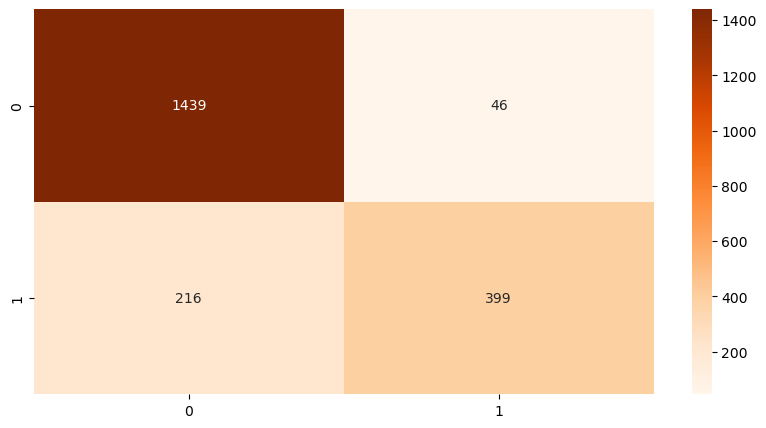

In [117]:
#Graficamos la matriz de confusión
plt.figure(figsize=(10,5))
sns.heatmap(conf_matriz_mejor, annot=True, fmt='d', cmap='Oranges')
plt.show()

Al ajustar los hiperparámetros se ha mejorado levemente la clasificación del modelo. Han mejorado todas las métricas a pesar de que sigue obteniendo numerosos Falsos Negativos pues solo ha mejorado el *Recall* en un $1\%$. Sin embargo, los resultados son los suficientemente desaeables para analizar que variables, o categorias, son las más relevantes en este modelo para designar si un empleado se va a ir o se va a quedar en la empresa. Para ello, organiaremos las variables según la importancia que les da el modelo y lo graficaremos.

In [118]:
#Analizamos la importancia de las distintas variables
importancia = mejor_modelo.feature_importances_
df_importancia = pd.DataFrame({'Variable': X.columns, '% Importancia': importancia*100})
df_importancia = df_importancia.sort_values(by='% Importancia', ascending= False)
df_importancia = df_importancia.reset_index(drop = True)
print(df_importancia)

                 Variable  % Importancia
0      satisfaction_level      29.389899
1      time_spend_company      16.935082
2    average_montly_hours      16.812037
3          number_project      14.660089
4         last_evaluation      13.250294
5              salary_low       1.132439
6           Work_accident       1.125377
7             salary_high       0.996371
8             sales_sales       0.804711
9           salary_medium       0.771163
10        sales_technical       0.679201
11          sales_support       0.669022
12       sales_accounting       0.414914
13               sales_IT       0.394338
14      sales_product_mng       0.388806
15               sales_hr       0.346322
16        sales_marketing       0.336122
17       sales_management       0.315858
18            sales_RandD       0.312479
19  promotion_last_5years       0.265475


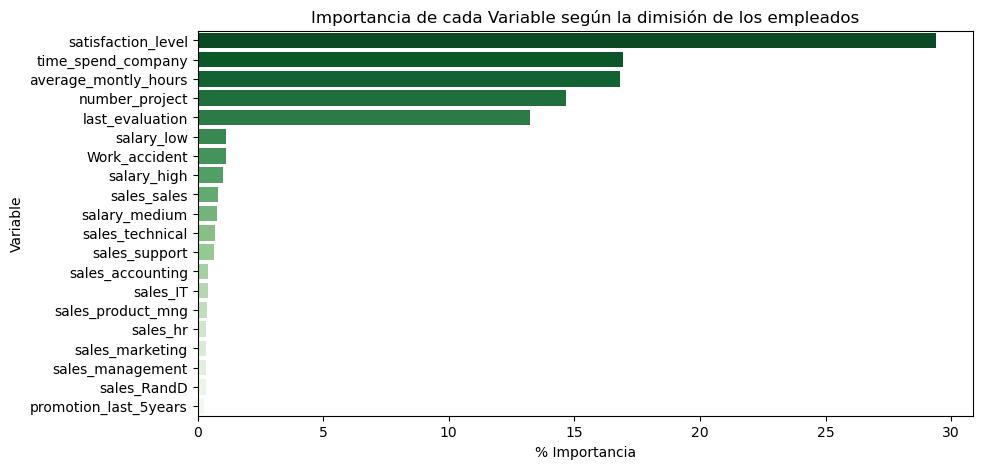

In [119]:
#Graficamos la importancia de cada variable
plt.figure(figsize=(10, 5))
sns.barplot(x='% Importancia', y='Variable', hue = 'Variable', data=df_importancia, palette='Greens_r')
plt.title('Importancia de cada Variable según la dimisión de los empleados')
plt.show()

Para nuestro modelo, las variables que mayor información aportan son `satisfaction_level`, `average_montly_hours`, `number_projects`, `time_spend_company` y `last_evaluation`. Las demás variables apenas aportan información siendo las mayores de estas `salary_low`, `Work_accident` y `salary_high` aportando entorno al $1\%$ cada una de ellas. A pesar de que sabemos que estas variables osn las más iomportantes, desconocemos como afectan al modelo por lo que a través de unos gráficos de densidades analizaremos que valores de estas variables afectan a la marcha de los empleados y cuales hacen que se queden.

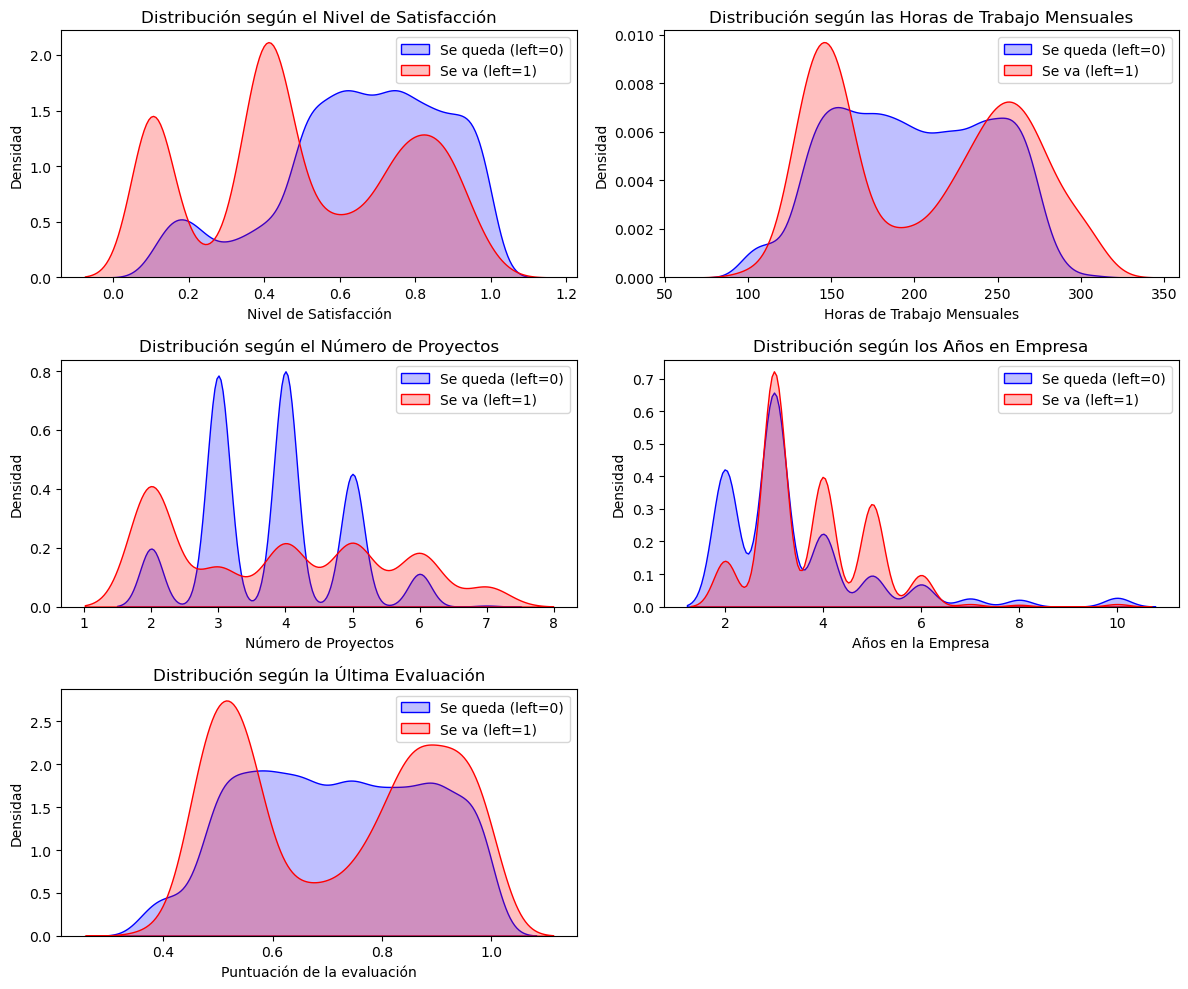

In [120]:
fig, ax = plt.subplots(3, 2, figsize=(12, 10))

#Gráfico satisfaction_level
sns.kdeplot(ci[ci['left'] == 0]['satisfaction_level'], label='Se queda (left=0)', fill=True, color='blue', ax=ax[0, 0])
sns.kdeplot(ci[ci['left'] == 1]['satisfaction_level'], label='Se va (left=1)', fill=True, color='red', ax=ax[0, 0])
ax[0, 0].set_title("Distribución según el Nivel de Satisfacción")
ax[0, 0].set_xlabel("Nivel de Satisfacción")
ax[0, 0].set_ylabel("Densidad")
ax[0, 0].legend()

#Gráfico average_montly_hours
sns.kdeplot(ci[ci['left'] == 0]['average_montly_hours'], label='Se queda (left=0)', fill=True, color='blue', ax=ax[0, 1])
sns.kdeplot(ci[ci['left'] == 1]['average_montly_hours'], label='Se va (left=1)', fill=True, color='red', ax=ax[0, 1])
ax[0, 1].set_title("Distribución según las Horas de Trabajo Mensuales")
ax[0, 1].set_xlabel("Horas de Trabajo Mensuales")
ax[0, 1].set_ylabel("Densidad")
ax[0, 1].legend()

#Gráfico number_project
sns.kdeplot(ci[ci['left'] == 0]['number_project'], label='Se queda (left=0)', fill=True, color='blue', ax=ax[1, 0])
sns.kdeplot(ci[ci['left'] == 1]['number_project'], label='Se va (left=1)', fill=True, color='red', ax=ax[1, 0])
ax[1, 0].set_title("Distribución según el Número de Proyectos")
ax[1, 0].set_xlabel("Número de Proyectos")
ax[1, 0].set_ylabel("Densidad")
ax[1, 0].legend()

#Gráfico time_spend_company
sns.kdeplot(ci[ci['left'] == 0]['time_spend_company'], label='Se queda (left=0)', fill=True, color='blue', ax=ax[1, 1])
sns.kdeplot(ci[ci['left'] == 1]['time_spend_company'], label='Se va (left=1)', fill=True, color='red', ax=ax[1, 1])
ax[1, 1].set_title("Distribución según los Años en Empresa")
ax[1, 1].set_xlabel("Años en la Empresa")
ax[1, 1].set_ylabel("Densidad")
ax[1, 1].legend()

#Gráfico time_spend_company
sns.kdeplot(ci[ci['left'] == 0]['last_evaluation'], label='Se queda (left=0)', fill=True, color='blue', ax=ax[2, 0])
sns.kdeplot(ci[ci['left'] == 1]['last_evaluation'], label='Se va (left=1)', fill=True, color='red', ax=ax[2, 0])
ax[2, 0].set_title("Distribución según la Última Evaluación")
ax[2, 0].set_xlabel("Puntuación de la evaluación")
ax[2, 0].set_ylabel("Densidad")
ax[2, 0].legend()

fig.delaxes(ax[2, 1])
plt.tight_layout()
plt.show()

Para finalizar, analizaremos las cinco gráficas superiores donde se muestra la distribución de diferentes variables (`satisfaction_level`, `average_montly_hours`, `number_projects`, `time_spend_company` y `last_evaluation`) según si los empleados **se quedan** (azul) o **se van** (rojo).

La gráfica superior izquierda muestra la satisfacción de los empleados. Aquellos cuya satisfacción es menor a $0.5$ (satisfacción baja) tienen una **alta probabilidad de irse**. También, aquellos con una satisfacción muy alta, entorno a $0.9$, $1.0$ **tienden a irse**. Esto último, puede atribuirse a un exceso de trabajo o una falta de desafios dentro de la empresa.

La gráfica superior derecha muestra como afecta las horas de trabajo mensuales a los empleados. Si estos tienen muy **pocas horas mensuales tienden a irse**, probablemente por falta de retos en el entorno laboral o falta de compromiso con la empresa al estar poco tiempo en ella. De la misma forma, si los empleados trabajan **demasiadas horas** tambien **suelen irse**, debido a la exceso de carga de trabajo.

En la gráfica del medio izquierda se observa la marcha de los empleados según el número de proyectos en la empresa. Parece que aquellos con **pocos o muchos proyectos deciden marcharse**, ya sea por falta de retos y aburrimiento laboral o exceso de trabajo y responsabilidades, respectivamente. Aparentemente, la mejor cantidad de proyectos ronda de entre $3$, $4$ y $5$.

La gráfica del medio derecha muestra la dsitribución de la marcha de los empleados según los años en la empresa. A partir de los **3 años**, los empleados **tienden a irse** más que a quedarse. Esto indica claramente que no se sienten realmente cómodos en la empresa a largo plazo. Hay que recalcar que los pocos empleados que llegan a alcanzar los **6 años** en la empresa si **tienden a quedarse** más tiempo.

La última grafica representa la marcha de los empleados según los resultados en la última evaluación. Aquellos con puntuaciones inferiores al $0.6$ **tienden a marcharse**. Sin embargo, aquellos con puntuaciones entre $0.9$ y $1.0$ también **se marchan**. Esto puede ser debido a que aprovechan la buena puntuación para encontrar mejores ofertas de trabajo. Este resultado puede estar relacionado la marcha de los empleados con alto nivel de satisfacción ya que, a pesar de ello, pueden estar encontrando ofertas de trabajo mejores.

Por lo tanto, estas 5 variables son las más relevantes para los empleados a la hora de decidir marcharse o quedarse. Es relevante añadir, que hay comportamientos de los cuales se desconoce realmente el motivo como por ejemplo la marcha de aquellos con alto nivel de satisfacción y cuya infdormación puede estar contenida en las demás variables que no hemos estudiado con precisión. También hay que remarcar que el modelo no ha podido entrenar con un rango excelente aquellos empleados que se marchan debido al elevado número de Falsos Negativos y eso estará afectectando probablemente a la importancia de las variables, no permitiendonos analizar mejor sus distribuciones. 

Para futuras revisiones, recomendaría buscar un modelo que clasifique mejor los valores positivos con el fin de mejorar el *Recall* y comprobar la correlación entre las distintas variables con el fin de mejorar el análisis realizado.